In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_data (path):
    extention =path.split('.')[-1]
    if extention == 'csv':
       data = pd. read_csv(path)
    elif extention == 'json' :
       data = json.load(path)
    elif extention == 'txt' :
       with open(file_path, 'r') as file:
            data = file.read()
    elif extention == 'db':
        conn = sqlite3.connect(file_path)
        query = "SELECT * FROM ;"
        data = pd.read_sql(query, conn)
        conn.close()
    else:
        raise ValueError("Unsupported file extension")
    return data

In [6]:
path = 'International_Report_Departures.csv'

data = load_data(path)

In [7]:
def basic_info(data):
    print('we have '+str(data.shape[0])+' sample ,and '+str(data.shape[1])+' feature\n')
    
    return (data.info() ,data.describe(), data.head())

info ,statistc ,head =basic_info(data)

we have 930808 sample ,and 16 feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 113.6+ MB


In [8]:
statistc

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000
mean,2006.021361,6.414783,12809.473781,42.511740,13484.676238,466.910479,20057.217505,0.599361,40.003181,2.005483,42.008665
std,8.558831,3.471070,2716.223845,27.571338,1932.601107,288.005971,479.071456,0.490028,60.948973,8.278403,60.340835
min,1990.000000,1.000000,10010.000000,1.000000,10119.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11868.000000,205.000000,19704.000000,0.000000,0.000000,0.000000,3.000000
50%,2007.000000,6.000000,12892.000000,33.000000,13408.000000,427.000000,19991.000000,1.000000,17.000000,0.000000,20.000000
75%,2014.000000,9.000000,13487.000000,72.000000,15084.000000,736.000000,20312.000000,1.000000,60.000000,1.000000,60.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,2019.000000,1092.000000,2019.000000


In [9]:
head

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [10]:
data[data.columns[data.isnull().any()]]

data.columns[data.isnull().any()].dtype

dtype('O')

In [11]:
for i in data.columns:
    print(i)
data[i].dtype

data_dte
Year
Month
usg_apt_id
usg_apt
usg_wac
fg_apt_id
fg_apt
fg_wac
airlineid
carrier
carriergroup
type
Scheduled
Charter
Total


dtype('int64')

In [12]:
def check(df,df_ID):
    print(data.isnull().sum())
    if data.isnull().sum() .sum() == 0:
        print ('\nNO Null Value')
    else :
        print('\nWarning :Null value ,deal with it')
        for c in data.columns :
            print(c)
            if data[c].dtype !='object' :
                print(c)
                if data[c].isna().sum()> data.shape[0]/4:
                    #print(c,'n')
                    data[c].dropna()
                elif data[c].isna().sum()==0:
                    continue
                else :
                    #print(c,'else')
                    data[c].fillna(data[c].mean(),inplace=True)
            else :
                if data[c] .isna().sum()>0:
                    mode_category = data[c].mode()[0] 
                    data[c].fillna(value=mode_category, inplace=True)
                    
        print(data.isnull().sum())
    if df_ID.is_unique:
        print('\nSample is unique no duplicated')
        
    else :
        print('\ndupplicated , deal with it ...')
        data_unique = data.drop_duplicates(keep='first')
    
    return data

In [13]:
data=check(data,data.index)

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

data_dte
Year
Year
Month
Month
usg_apt_id
usg_apt_id
usg_apt
usg_wac
usg_wac
fg_apt_id
fg_apt_id
fg_apt
fg_wac
fg_wac
airlineid
airlineid
carrier
carriergroup
carriergroup
type
Scheduled
Scheduled
Charter
Charter
Total
Total
data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

Sample is unique no duplicated


In [14]:
def uniq (df):
    df=pd.DataFrame([[i,df[i].unique(),df[i].dtype,len(df[i].unique())]for i in df.columns],columns=['feature','val','types','len']).set_index('feature')
    return df

In [15]:
uniq(data)

,val,types,len
feature,,,
data_dte,"[05/01/2006, 05/01/2003, 03/01/2007, 12/01/200...",object,363
Year,"[2006, 2003, 2007, 2004, 2009, 2002, 2008, 200...",int64,31
Month,"[5, 3, 12, 10, 2, 11, 7, 9, 8, 6, 4, 1]",int64,12
usg_apt_id,"[12016, 10299, 10721, 11259, 13303, 14761, 141...",int64,1015
usg_apt,"[GUM, ANC, BOS, DAL, MIA, SFB, PHL, YIP, ORD, ...",object,1022
usg_wac,"[5, 1, 13, 74, 33, 23, 43, 41, 64, 36, 21, 66,...",int64,54
fg_apt_id,"[13162, 13856, 12651, 16271, 11075, 11928, 110...",int64,1666
fg_apt,"[MAJ, OKO, KEF, YYZ, CMW, GLA, CUN, YQG, YEG, ...",object,1669
fg_wac,"[844, 736, 439, 936, 219, 493, 148, 916, 934, ...",int64,229


In [16]:
def cat(data):
    cat_feature=[i for  i in data.columns  if data[i].dtype =='object']
    return cat_feature
cat_feature = cat(data)
cat_feature

['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type']

In [17]:
def num(data):
    num_feature=[i for  i in data.columns  if data[i].dtype !='object']
    return num_feature
num_feature=num(data)
num_feature

['Year',
 'Month',
 'usg_apt_id',
 'usg_wac',
 'fg_apt_id',
 'fg_wac',
 'airlineid',
 'carriergroup',
 'Scheduled',
 'Charter',
 'Total']

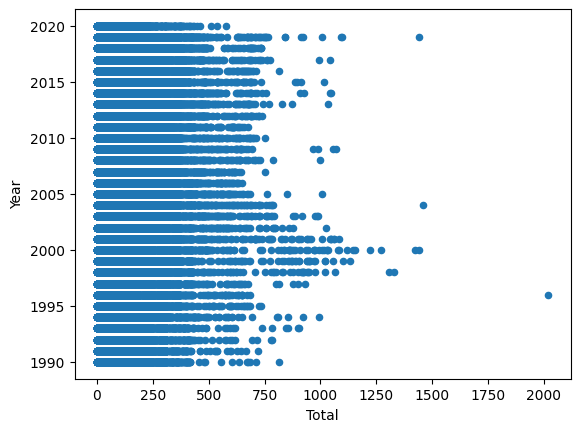

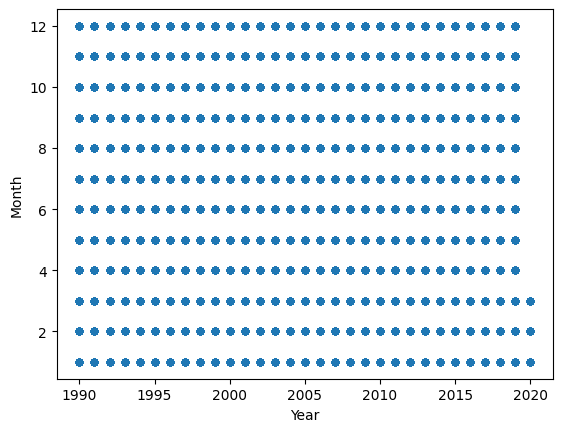

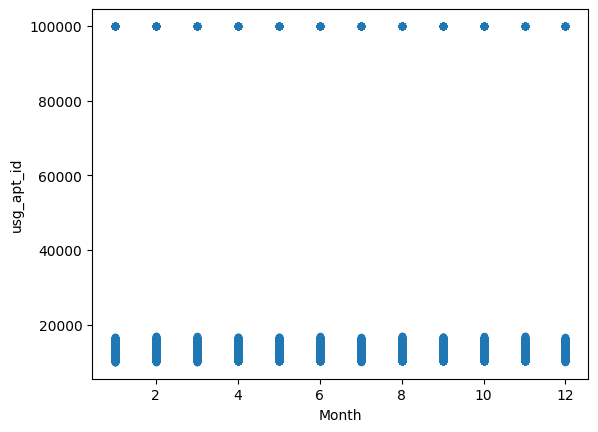

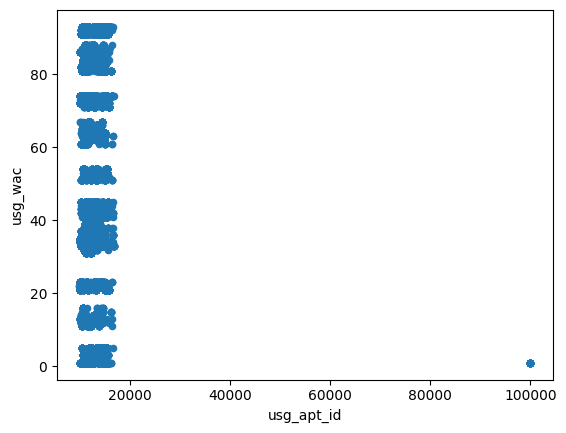

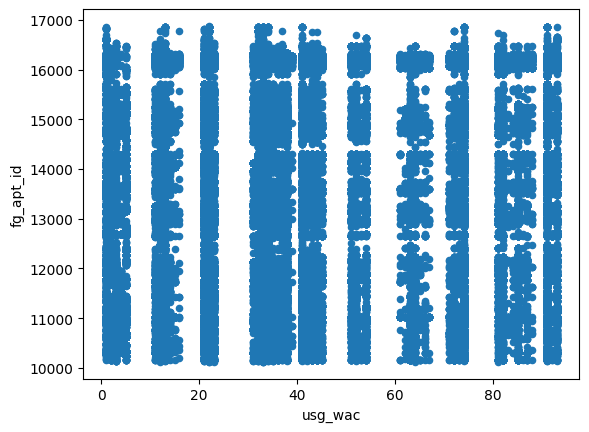

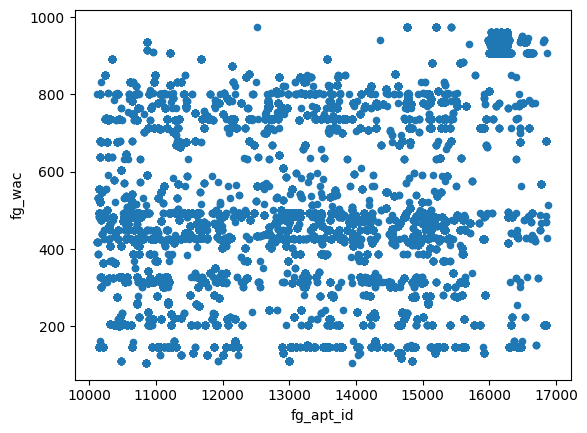

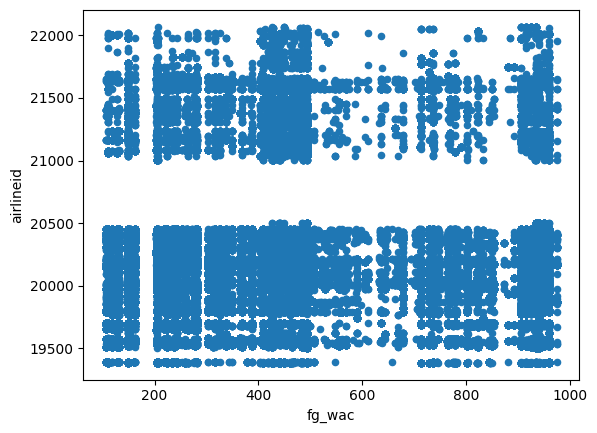

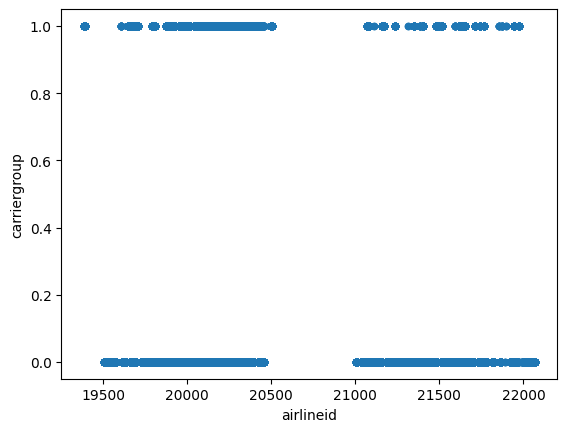

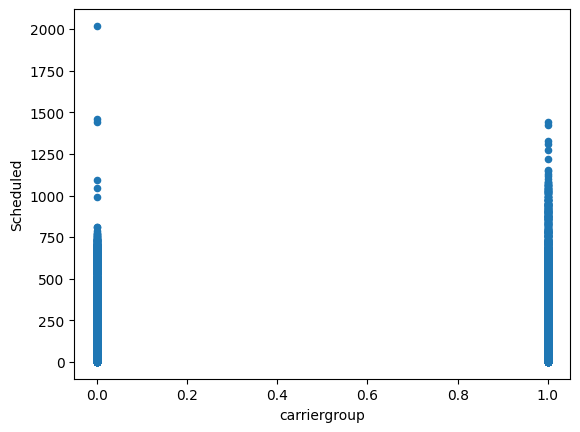

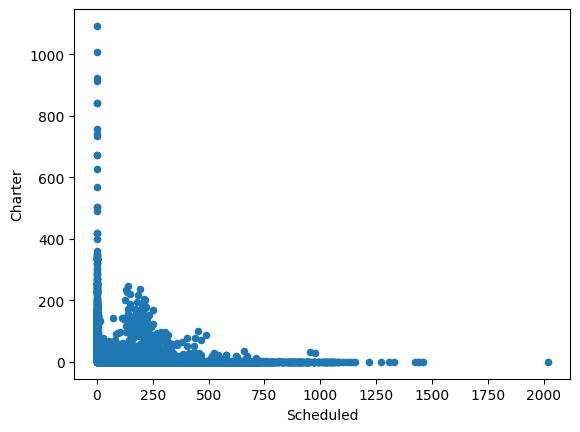

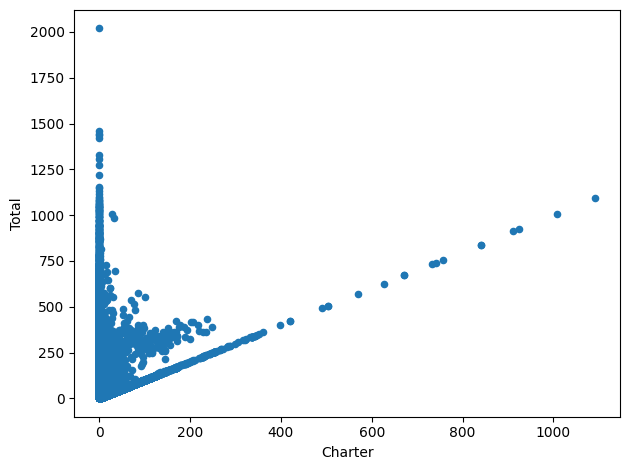

In [18]:
import seaborn as sns
def scatter(data,num_feature):

    for i in range(0,len(num_feature)):
        data.plot.scatter(x=num_feature[i-1],y=num_feature[i])    
    plt.tight_layout()
    plt.show()
    
scatter(data,num_feature)

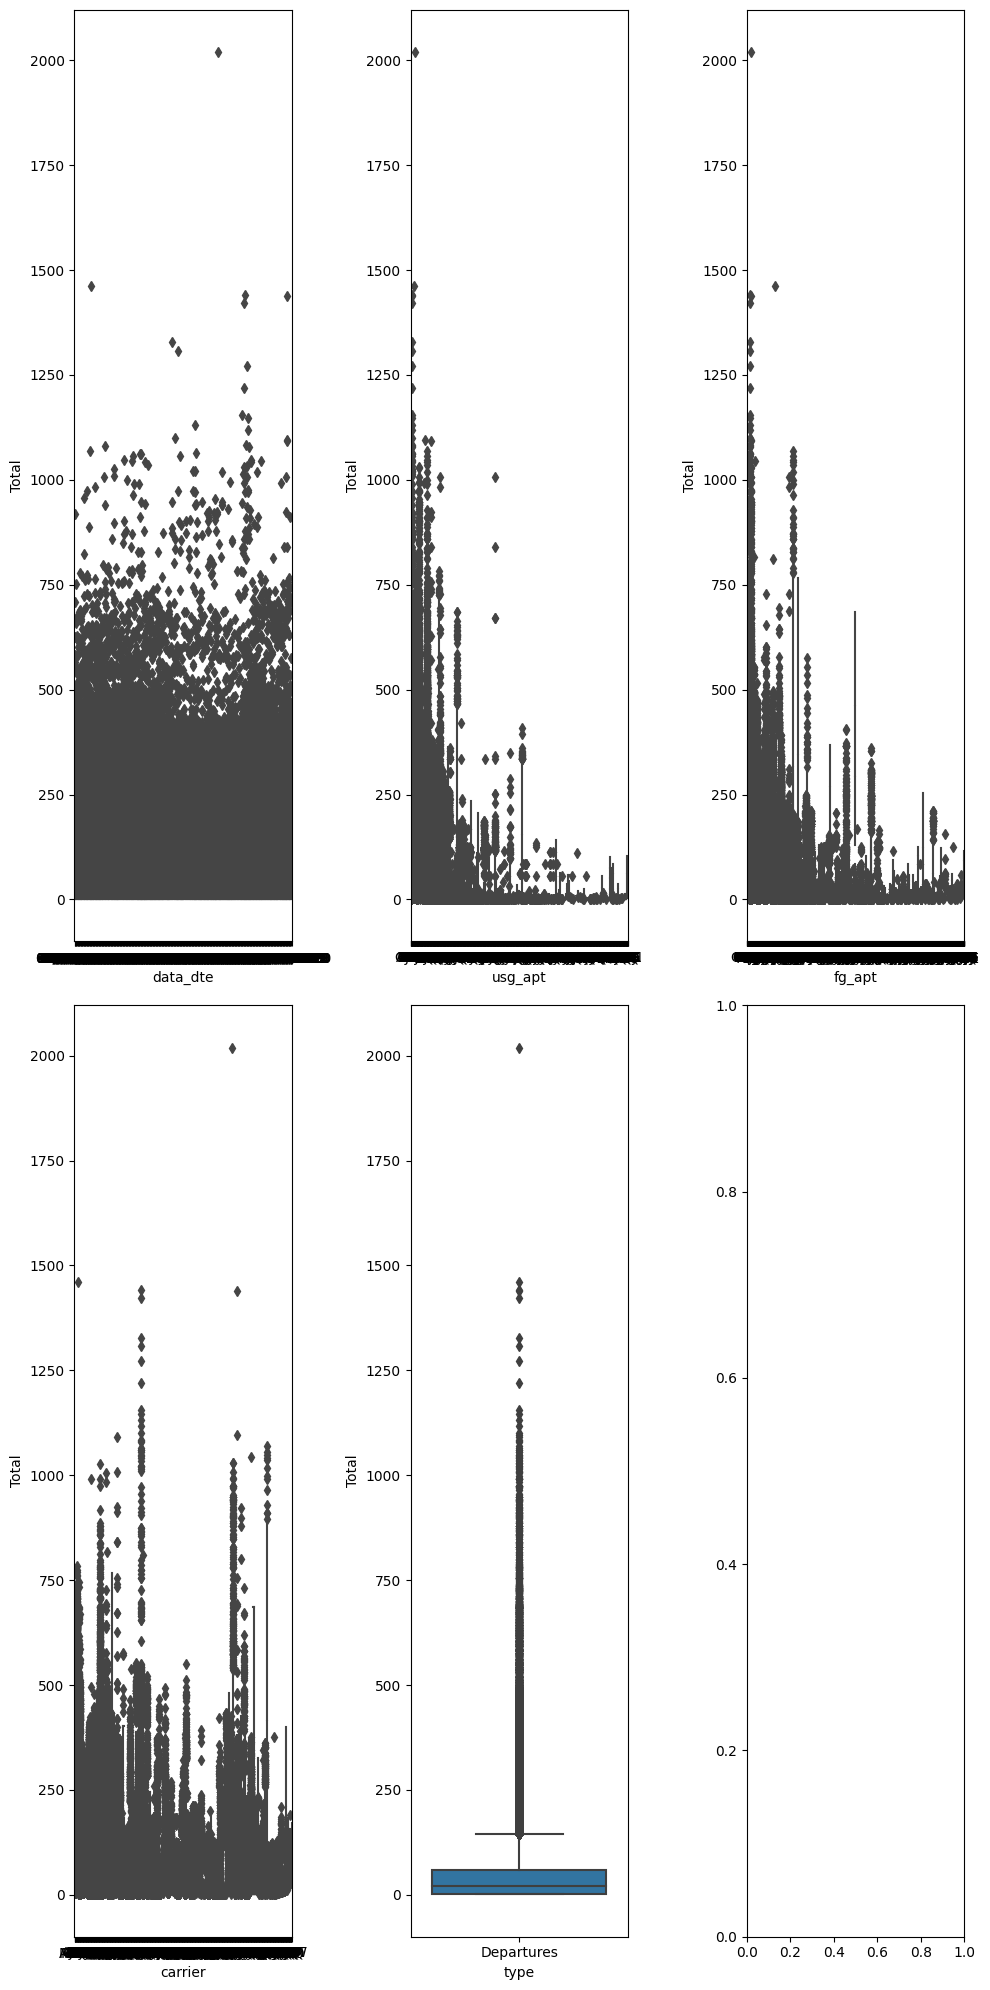

In [19]:
def box(data,cat_feature,target):
    fig, axes = plt.subplots(len(cat_feature)//3+1, 3, figsize=(10, 20))

    for i, f in enumerate(cat_feature):
        row = i // 3  
        col = i % 3  
        sns.boxplot(x=f,y=target,data=data, ax=axes[row, col])

    plt.tight_layout()  
    plt.show()
    
box(data,cat_feature,data.iloc[:,-1])

In [20]:
df_dummy=pd.get_dummies(data)

In [21]:
df_dummy .head()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,...,carrier_ZL,carrier_ZN,carrier_ZP,carrier_ZQ,carrier_ZS,carrier_ZUQ,carrier_ZV,carrier_ZW,carrier_ZX,type_Departures
0,2006,5,12016,5,13162,844,20177,1,0,10,...,False,False,False,False,False,False,False,False,False,True
1,2003,5,10299,1,13856,736,20007,1,0,15,...,False,False,False,False,False,False,False,False,False,True
2,2007,3,10721,13,12651,439,20402,1,0,1,...,False,False,False,False,False,False,False,False,False,True
3,2004,12,11259,74,16271,936,20201,1,0,1,...,False,False,False,False,False,False,False,False,False,True
4,2009,5,13303,33,11075,219,21323,0,0,20,...,False,False,False,False,False,False,False,False,False,True


In [25]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in [num_feature]:
    df_dummy[col] = mms.fit_transform(df_dummy[col])

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df_dummy